In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
 Drug_Effect=pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/Python Datasets/Islander_data.csv')

In [5]:
Drug_Effect.dropna()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2


In [6]:
Drug_Effect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
first_name          198 non-null object
last_name           198 non-null object
age                 198 non-null int64
Happy_Sad_group     198 non-null object
Dosage              198 non-null int64
Drug                198 non-null object
Mem_Score_Before    198 non-null float64
Mem_Score_After     198 non-null float64
Diff                198 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [7]:
Drug_Effect.isnull().sum()

first_name          0
last_name           0
age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
Diff                0
dtype: int64

In [12]:
Drug_Effect.drop(labels=['first_name','last_name','Diff'],axis=1)

,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,25,H,1,A,63.5,61.2
1,52,S,1,A,41.6,40.7
2,29,H,1,A,59.7,55.1
3,50,S,1,A,51.7,51.2
4,52,H,1,A,47.0,47.1
...,...,...,...,...,...,...
193,52,H,3,T,71.3,74.3
194,41,S,3,T,72.5,70.4
195,54,S,3,T,30.8,33.1
196,40,H,3,T,53.6,53.8


In [13]:
Drug_Effect

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2


In [14]:
Drug_Effect.columns

Index(['first_name', 'last_name', 'age', 'Happy_Sad_group', 'Dosage', 'Drug',
       'Mem_Score_Before', 'Mem_Score_After', 'Diff'],
      dtype='object')

In [15]:
Drug_Effect_dosage=pd.DataFrame(Drug_Effect,columns=['age','Happy_Sad_group','Dosage','Drug','Mem_Score_Before','Mem_Score_After'])

In [16]:
Drug_Effect_dosage

,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,25,H,1,A,63.5,61.2
1,52,S,1,A,41.6,40.7
2,29,H,1,A,59.7,55.1
3,50,S,1,A,51.7,51.2
4,52,H,1,A,47.0,47.1
...,...,...,...,...,...,...
193,52,H,3,T,71.3,74.3
194,41,S,3,T,72.5,70.4
195,54,S,3,T,30.8,33.1
196,40,H,3,T,53.6,53.8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023156BAD888>]],
      dtype=object)

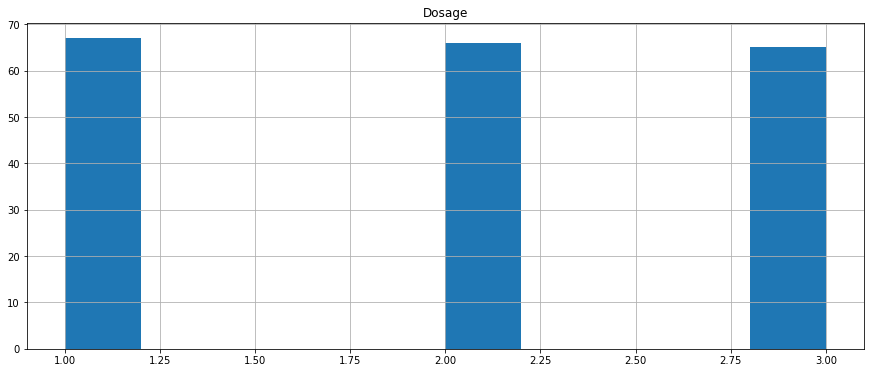

In [21]:
Drug_Effect_dosage.hist('Dosage', figsize=(15,6))

In [22]:
Drug_Effect_dosage.describe(include='all')

,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
count,198.000000,198,198.000000,198,198.000000,198.000000
unique,NaN,2,NaN,3,NaN,NaN
top,NaN,H,NaN,A,NaN,NaN
freq,NaN,99,NaN,67,NaN,NaN
mean,39.530303,NaN,1.989899,NaN,57.967677,60.922222
std,12.023099,NaN,0.818504,NaN,15.766007,18.133851
min,24.000000,NaN,1.000000,NaN,27.200000,27.100000
25%,30.000000,NaN,1.000000,NaN,46.525000,47.175000
50%,37.000000,NaN,2.000000,NaN,54.800000,56.750000
75%,48.000000,NaN,3.000000,NaN,68.400000,73.250000


In [23]:
Q1=Drug_Effect_dosage.quantile(0.25)
Q3=Drug_Effect_dosage.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age                 18.000
Dosage               2.000
Mem_Score_Before    21.875
Mem_Score_After     26.075
dtype: float64


In [27]:
Drug_Effect_dosage.shape

(198, 6)

In [28]:
Drug_Effect_dosage_out=Drug_Effect_dosage[~((Drug_Effect_dosage<(Q1-1.5*IQR))|(Drug_Effect_dosage>(Q3+1.5*IQR))).any(axis=1)]

In [26]:
Drug_Effect_dosage.shape

(198, 6)

In [29]:
Drug_Effect_dosage.corr()

,age,Dosage,Mem_Score_Before,Mem_Score_After
age,1.000000,0.035107,0.066010,0.051879
Dosage,0.035107,1.000000,0.044149,0.171219
Mem_Score_Before,0.066010,0.044149,1.000000,0.807528
Mem_Score_After,0.051879,0.171219,0.807528,1.000000


In [33]:
Drug_Effect_dosage['Drug'].unique()

array(['A', 'S', 'T'], dtype=object)

In [34]:
mapping={'A':1,'S':2,'T':3}

Drug_Effect_dosage['Drug']=Drug_Effect_dosage['Drug'].map(mapping)

In [35]:
Drug_Effect_dosage

,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,25,1,1,1,63.5,61.2
1,52,0,1,1,41.6,40.7
2,29,1,1,1,59.7,55.1
3,50,0,1,1,51.7,51.2
4,52,1,1,1,47.0,47.1
...,...,...,...,...,...,...
193,52,1,3,3,71.3,74.3
194,41,0,3,3,72.5,70.4
195,54,0,3,3,30.8,33.1
196,40,1,3,3,53.6,53.8


In [42]:
## Analyzing correlation with continuous target Variable with categorical variable

cat_cols=['Happy_Sad_group','Dosage','Drug']

from scipy.stats import f_oneway


for i in cat_cols:
    Annovactegory =Drug_Effect_dosage.groupby(i)['Mem_Score_After'].apply(list)
    Annovaresult=f_oneway(* Annovactegory)
    print("The P value is ",  Annovaresult[1])
    if( Annovaresult[1]<0.05):
        print(i,"is correleated")
    else:
        print(i,"is not correleated")
    





The P value is  0.7894204944119692
Happy_Sad_group is not correleated
The P value is  0.05393316242083108
Dosage is not correleated
The P value is  0.0006227122392760432
Drug is correleated


In [49]:
Drug_Effect_dosage['Mem_Score_After'].unique

<bound method Series.unique of 0      61.2
1      40.7
2      55.1
3      51.2
4      47.1
       ... 
193    74.3
194    70.4
195    33.1
196    53.8
197    42.1
Name: Mem_Score_After, Length: 198, dtype: float64>

In [43]:
Predictors=['age','Dosage','Drug','Mem_Score_Before']
Target=['Mem_Score_After']



In [55]:
## Min Max scalar is being used

from sklearn import preprocessing


P_Std=preprocessing.MinMaxScaler()
T_Std=preprocessing.MinMaxScaler()

X=P_Std.fit_transform(Drug_Effect_dosage[Predictors].values)
y=T_Std.fit_transform(np.reshape(Drug_Effect_dosage[Target].values,(-1,1)))



In [56]:
print(X.shape)

(198, 4)


In [57]:
print(y.shape)

(198, 1)


In [60]:
y[0:20]
print(np.max(y))
print(np.min(y))


0.9999999999999998
0.0


In [68]:
T_Std.inverse_transform(y)[0:4]

array([[61.2],
       [40.7],
       [55.1],
       [51.2]])

In [71]:
## Splitting into training and test data

from sklearn.model_selection import train_test_split


In [98]:
## performimg regression using Artificial Neural network


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.31,random_state=78)

model = Sequential()

model.add(Dense(units=3, input_dim=4, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')



In [100]:
model.fit(X_train, y_train ,batch_size = 5, epochs = 16, verbose=1)

Epoch 1/16
136/136 [==============================] - 0s 836us/step - loss: 0.1688
Epoch 2/16
136/136 [==============================] - 0s 279us/step - loss: 0.1497
Epoch 3/16
136/136 [==============================] - 0s 279us/step - loss: 0.1332
Epoch 4/16
136/136 [==============================] - 0s 264us/step - loss: 0.1187
Epoch 5/16
136/136 [==============================] - 0s 281us/step - loss: 0.1057
Epoch 6/16
136/136 [==============================] - 0s 285us/step - loss: 0.0943
Epoch 7/16
136/136 [==============================] - 0s 267us/step - loss: 0.0846
Epoch 8/16
136/136 [==============================] - 0s 282us/step - loss: 0.0764
Epoch 9/16
136/136 [==============================] - 0s 291us/step - loss: 0.0698
Epoch 10/16
136/136 [==============================] - 0s 241us/step - loss: 0.0638
Epoch 11/16
136/136 [==============================] - 0s 344us/step - loss: 0.0591
Epoch 12/16
136/136 [==============================] - 0s 255us/step - loss: 0.0551
E

In [101]:
predictions=model.predict(X_test)

predictedvar=T_Std.inverse_transform(predictions)

Y_origin=T_Std.inverse_transform(y_test)

APE=(np.abs(Y_origin-predictedvar)/Y_origin)*100

print("Accuracy score :",100-np.median(APE))



Accuracy score : 81.72663140513866
